In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_cleaned.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
tcp = df[df['protocol_type']=='tcp']
tcp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
9,0,tcp,http,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
11,0,tcp,http,SF,230,260,0,0,0,0,...,255,1.00,0.00,0.33,0.07,0.33,0.0,0.00,0.00,normal.
14,1,tcp,smtp,SF,3170,329,0,0,0,0,...,39,0.72,0.11,0.02,0.00,0.02,0.0,0.09,0.13,normal.
15,0,tcp,http,SF,297,13787,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
16,0,tcp,http,SF,291,3542,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.


In [ ]:
features = ["service","src_bytes","wrong_fragment","count","num_compromised","srv_count","srv_serror_rate","serror_rate"]
target = "result"

In [5]:
services = tcp['service'].unique()
services

array(['http', 'smtp', 'ftp_data', 'ftp', 'other', 'auth', 'IRC', 'X11',
       'finger', 'time', 'domain', 'telnet', 'pop_3', 'private', 'ldap',
       'login', 'name', 'http_443', 'sunrpc', 'printer', 'systat',
       'netstat', 'remote_job', 'link', 'sql_net', 'bgp', 'pop_2', 'uucp',
       'imap4', 'pm_dump', 'nnsp', 'courier', 'daytime', 'iso_tsap',
       'echo', 'discard', 'ssh', 'whois', 'mtp', 'gopher', 'rje', 'ctf',
       'supdup', 'hostnames', 'csnet_ns', 'uucp_path', 'nntp',
       'netbios_ns', 'netbios_dgm', 'netbios_ssn', 'vmnet', 'Z39_50',
       'exec', 'shell', 'efs', 'klogin', 'kshell', 'icmp'], dtype=object)

# Label Encoding

In [6]:
for i in range(len(services)):
    tcp = tcp.replace(services[i], i-35)

tcp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
9,0,tcp,-35,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
11,0,tcp,-35,SF,230,260,0,0,0,0,...,255,1.00,0.00,0.33,0.07,0.33,0.0,0.00,0.00,normal.
14,1,tcp,-34,SF,3170,329,0,0,0,0,...,39,0.72,0.11,0.02,0.00,0.02,0.0,0.09,0.13,normal.
15,0,tcp,-35,SF,297,13787,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
16,0,tcp,-35,SF,291,3542,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.


In [9]:
classes = np.unique(tcp[target])
print(classes)

['apache2.' 'back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.'
 'httptunnel.' 'imap.' 'land.' 'loadmodule.' 'mailbomb.' 'mscan.'
 'multihop.' 'named.' 'neptune.' 'nmap.' 'normal.' 'perl.' 'phf.'
 'portsweep.' 'processtable.' 'ps.' 'rootkit.' 'saint.' 'satan.'
 'sendmail.' 'sqlattack.' 'warezmaster.' 'worm.' 'xlock.' 'xsnoop.'
 'xterm.']


In [13]:
#replacing all classes of attack with 1 and normal result with 0 in our tcp_df
for i in range(len(classes)):
    if classes[i] == 'normal.':
        tcp = tcp.replace(classes[i], 0)
    else:
        tcp = tcp.replace(classes[i], 1)

In [14]:
X = tcp[features]
y = tcp[target]

# HeatMap to demonstrate Relationship

[]

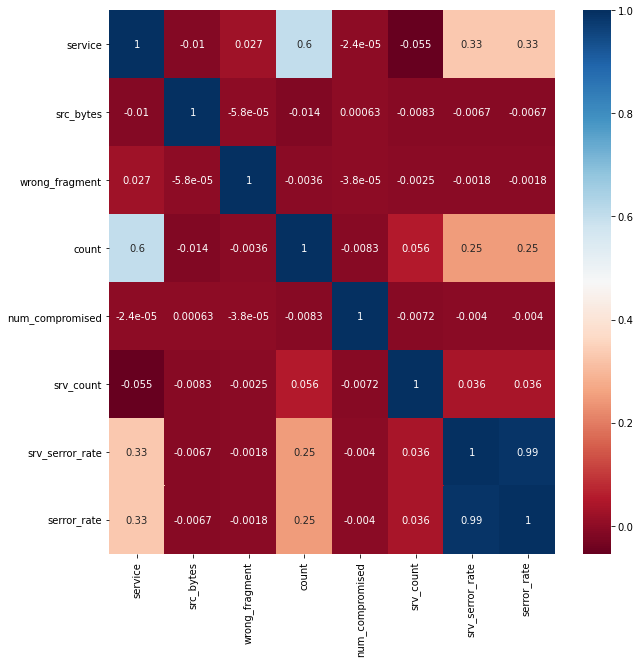

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(tcp[features].corr(), annot=True,cmap="RdBu")
plt.plot()

# Evaluating Important Features 

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

src_bytes          0.408328
service            0.325076
count              0.175673
srv_count          0.030716
serror_rate        0.023051
srv_serror_rate    0.022144
num_compromised    0.014998
wrong_fragment     0.000014
dtype: float64


In [18]:
#updated feature selection to release overfitting and accuracy improvement
#in generalised prediction
X = X[["service","count","srv_count","src_bytes","serror_rate"]]

# Machine Learning Model

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

In [21]:
models = [('Logistic Regression',LogisticRegression(solver='liblinear')), 
          ('KNN Classifier',KNeighborsClassifier(n_neighbors=3)),
          ('MLP Classifer',MLPClassifier(alpha=0.005)),
          ('Decision Tree Classifier',DecisionTreeClassifier(random_state=3)),
          ('Random Forest Classfier',RandomForestClassifier(random_state=3))
         ]

scores=list()

In [22]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    
    print('\n',name)
    print('---------------------------------')
    print("Accuracy of the model is: ", score)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("*=============================================================*")


 Logistic Regression
---------------------------------
Accuracy of the model is:  88.39924039320822
Confusion Matrix:
 [[13151    36]
 [ 4118 18503]]
Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     13187
           1       1.00      0.82      0.90     22621

    accuracy                           0.88     35808
   macro avg       0.88      0.91      0.88     35808
weighted avg       0.91      0.88      0.89     35808

*=============================================================*

 KNN Classifier
---------------------------------
Accuracy of the model is:  99.68163538873995
Confusion Matrix:
 [[13142    45]
 [   69 22552]]
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13187
           1       1.00      1.00      1.00     22621

    accuracy                           1.00     35808
   macro avg       1.00      1.00      1.00     35808
weighted avg       1.0

# Final Results

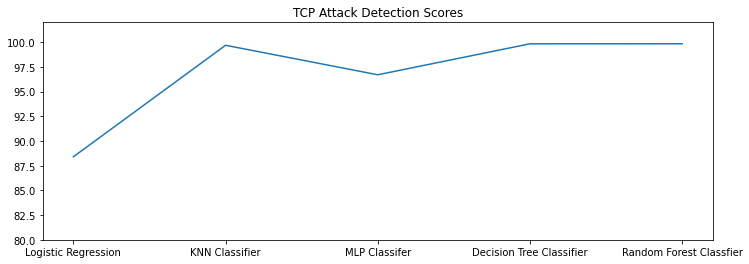

In [24]:
classifiers = [name for name,_ in models]
plt.figure(figsize=(12,4))
plt.plot(classifiers,scores)
plt.title("TCP Attack Detection Scores")
plt.ylim(80,102)
plt.show()